Importing libs

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2


define paremetrs for lamdba

In [181]:
num_samples = 10000
a_values = [0, 2, 4] 
omega_values = [1, 2, 3] 
num_bins = 30
alpha = 0.05


In [182]:
def calculate_mu():
    # Генерація випадкових чисел Xi(i) з рівномірним розподілом на інтервалі (0, 1)
    xi_values = np.random.rand(12)
    return np.sum(xi_values - 6)


In [183]:
def generate_x(omega, a):
    mu = np.array([calculate_mu() for _ in range(num_samples)])
    return omega * mu + a

In [184]:
def chi_squared_test(random_numbers, num_bins, alpha):
    observed_frequencies = np.histogram(random_numbers, bins=num_bins, density=True)[0]
    expected_frequency = norm.pdf(np.linspace(-3, 3, num_bins))
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)
    
    degrees_of_freedom = num_bins - 1
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical

define function for building plot

omega=1, a=0
Статистика Chi-squared: 0.1950215735068273
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


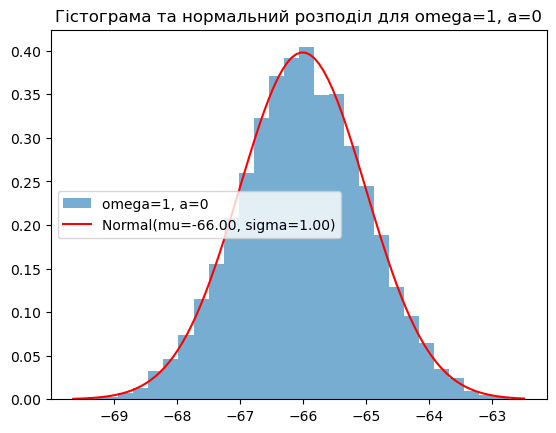

omega=2, a=0
Статистика Chi-squared: 1.5422856055699552
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


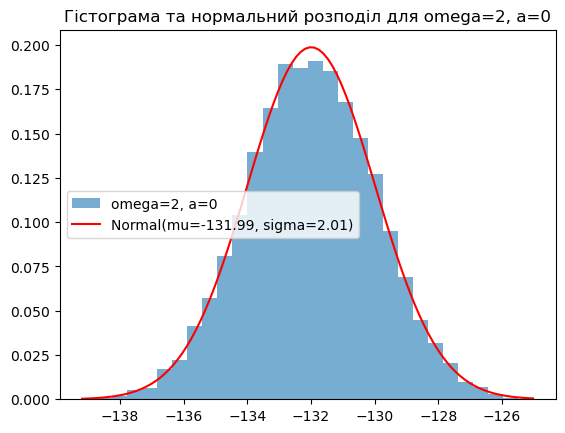

omega=3, a=0
Статистика Chi-squared: 2.502388255595133
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


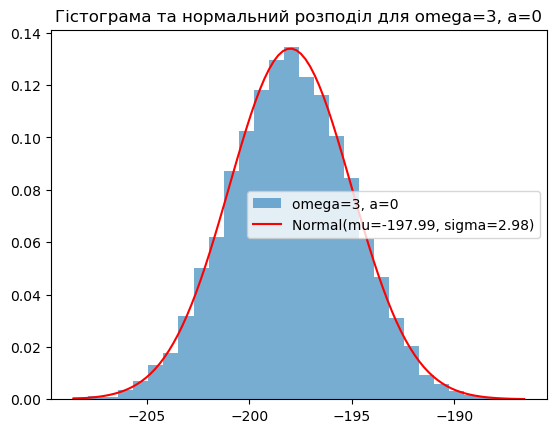

omega=1, a=2
Статистика Chi-squared: 0.2444493987816008
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


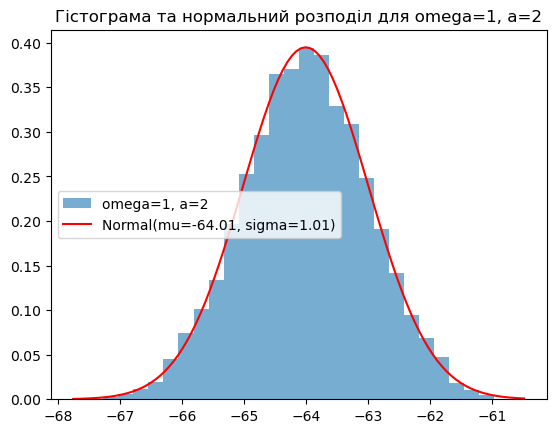

omega=2, a=2
Статистика Chi-squared: 1.6407649297345275
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


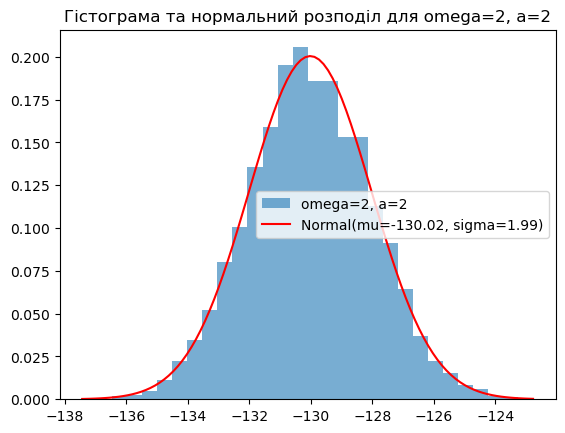

omega=3, a=2
Статистика Chi-squared: 2.342273462768997
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


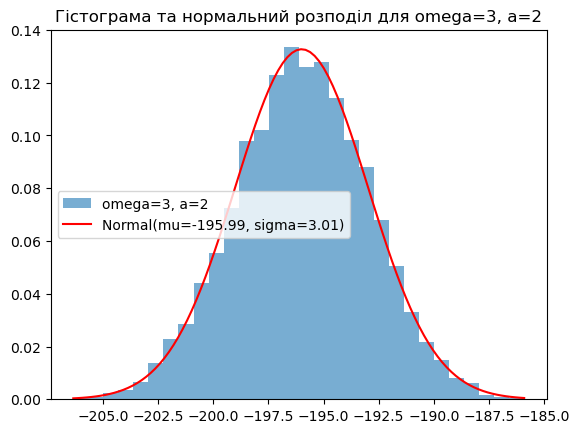

omega=1, a=4
Статистика Chi-squared: 0.3564590577053022
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


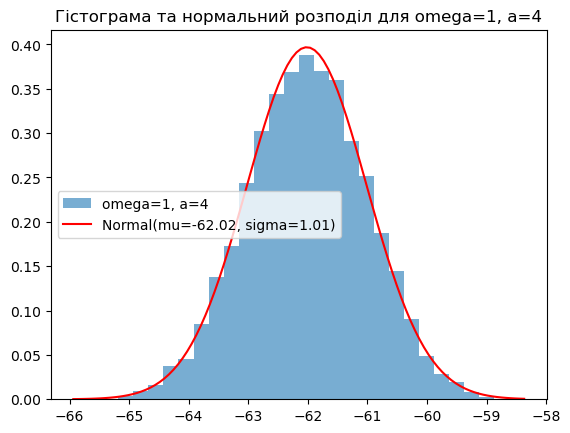

omega=2, a=4
Статистика Chi-squared: 1.642291778452781
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


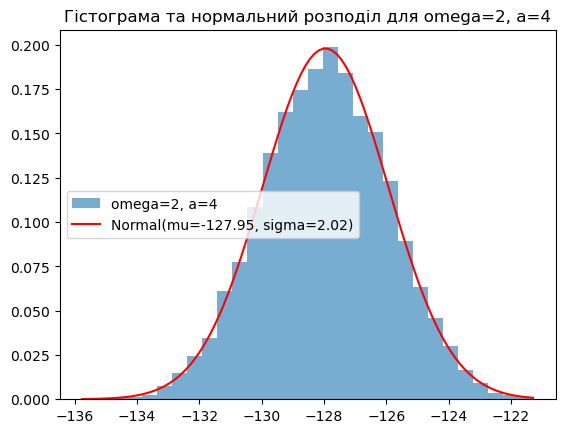

omega=3, a=4
Статистика Chi-squared: 2.4532649315615602
Критичне значення Chi-squared: 42.55696780429269
Нульову гіпотезу не відхиляємо (розподіл відповідає)


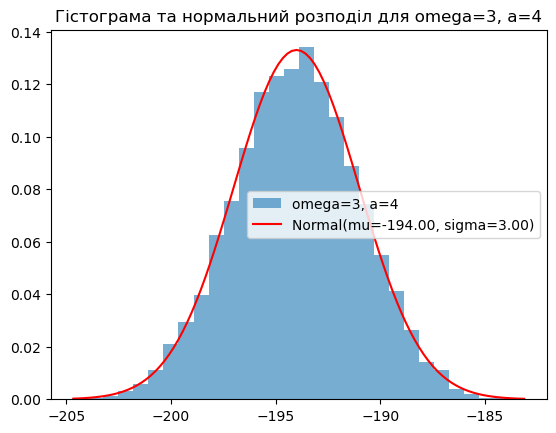

In [185]:
for a in a_values:
    for omega in omega_values:
        x_values = generate_x(omega, a)
        
        # Обчислення середнього і дисперсії
        mean = np.mean(x_values)
        variance = np.var(x_values)
        
        # Обчислення нормального розподілу
        x_range = np.linspace(min(x_values), max(x_values), 100)
        normal_pdf = norm.pdf(x_range, loc=mean, scale=np.sqrt(variance))
        
        # Побудова гістограми
        plt.hist(x_values, bins=num_bins, density=True, alpha=0.6, label=f'omega={omega}, a={a}')
        plt.plot(x_range, normal_pdf, 'r-', label=f'Normal(mu={mean:.2f}, sigma={np.sqrt(variance):.2f})')
        
        # Виклик функції для тесту Chi^2
        chi_squared_statistic, chi_squared_critical = chi_squared_test(x_values, num_bins, alpha)
        
        print(f'omega={omega}, a={a}')
        print(f'Статистика Chi-squared: {chi_squared_statistic}')
        print(f'Критичне значення Chi-squared: {chi_squared_critical}')
        
        # Порівняння результатів тесту з критичним значенням
        if chi_squared_statistic <= chi_squared_critical:
            print('Нульову гіпотезу не відхиляємо (розподіл відповідає)')
        else:
            print('Нульову гіпотезу відхиляємо (розподіл не відповідає)')
        
        
        plt.legend()
        plt.title(f'Гістограма та нормальний розподіл для omega={omega}, a={a}')
        plt.show()